# LARGER DATASETS

In [143]:
#IMPORTING LIBRARIES    
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
#read insurance data set
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [145]:
# lets try one hot encoding in our data frame due to the categorical data in our data frame (it has strings,integers,floats)
insurance_one_hot=pd.get_dummies(insurance).astype(int)
insurance_one_hot.head() #The insurance_one_hot.head() command in pandas is used to display the first few rows of the insurance_one_hot DataFrame. By default, head() shows the first 5 rows, but you can specify a different number of rows by passing an argument to the method (e.g., head(10) would show the first 10 rows).

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [146]:
#create X and y values (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]
X.head(),y.head()

(   age  bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19   27         0           1         0          0           1   
 1   18   33         1           0         1          1           0   
 2   28   33         3           0         1          1           0   
 3   33   22         0           0         1          1           0   
 4   32   28         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884
 1     1725
 2     4449
 3    21984
 4     3866
 Name: charges, dtype: int32)

In [147]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [148]:
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13275.7412 - mae: 13275.7412
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13050.7793 - mae: 13050.7793 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12544.8701 - mae: 12544.8701
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11620.5840 - mae: 11620.5840 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10309.4619 - mae: 10309.4619 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8962.1455 - mae: 8962.1455
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7936.8159 - mae: 7936.8159
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7483.5845 - mae: 7483.5845
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7389.6558 - mae: 7389.6558
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7356.9937 - mae: 7356.9937
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7333.6685 - mae: 7333.6685 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━

In [149]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5371.9170 - mae: 5371.9170  


[5206.23779296875, 5206.23779296875]

In [150]:
y_train.mean()

13345.596261682243

Increasing the number of layers (2 -> 3).
Increasing the number of units in each layer (except for the output layer).
Changing the optimizer (from SGD to Adam).

In [151]:
#Right now our model is running substantially wrong so we are goonna try to improve our model
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history=insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12635.0254 - mae: 12635.0254
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7586.3086 - mae: 7586.3086
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7251.9473 - mae: 7251.9473
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7054.8545 - mae: 7054.8545
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6810.3921 - mae: 6810.3921
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6496.2324 - mae: 6496.2324
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6292.6187 - mae: 6292.6187
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6155.0542 - mae: 6155.0542
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6017.6831 - mae: 6017.6831 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5850.4595 - mae: 5850.4595
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5618.8354 - mae: 5618.8354
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [152]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3212.8372 - mae: 3212.8372  


[3160.4189453125, 3160.4189453125]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

🔑 Note: For many problems, the Adam optimizer is a great starting choice. See Andrei Karpathy's "Adam is safe" point from A Recipe for Training Neural Networks for more.

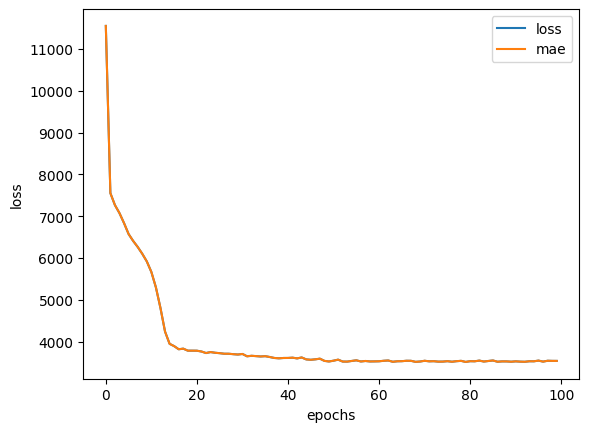

In [153]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [154]:
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history_3=insurance_model_3.fit(X_train,y_train,epochs=100,verbose=0)

In [155]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3229.7163 - mae: 3229.7163  


[3169.83544921875, 3169.83544921875]

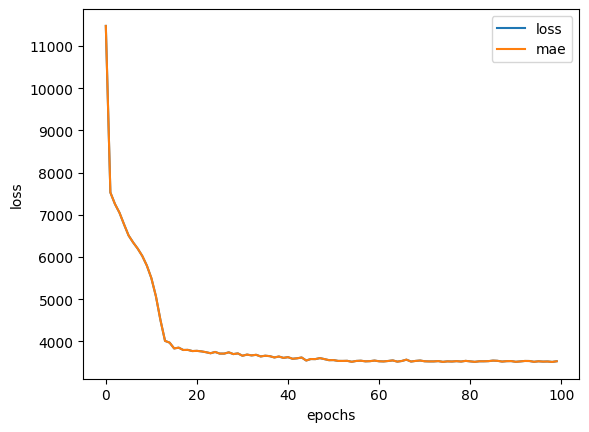

In [156]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [157]:
y_train.mean()

13345.596261682243

In [158]:
#how long should you train?
# it depends . really... it depends on the problem . IN tensor flow there is a concept called as EarlyStopping.Callback which is a tensorflow component you can add to your model to stop from imporving a certain metrics

In [159]:
#lets use early stopping callbacks
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(X_train.shape[1],)),  # Ensure input shape is defined
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history_4=insurance_model_4.fit(X_train,y_train,epochs=200,verbose=0)

c:\Users\ayush\OneDrive\Documents\Personal projects\MachineLearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
insurance_model_4.evaluate(X_test,y_test),insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3231.1499 - mae: 3231.1499  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3229.7163 - mae: 3229.7163  


([3167.111572265625, 3167.111572265625], [3169.83544921875, 3169.83544921875])

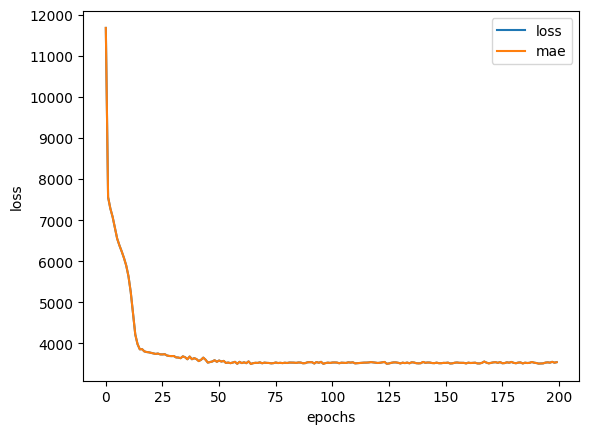

In [161]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

#Preprocessing data (normalization and standardization)

<Axes: ylabel='Frequency'>

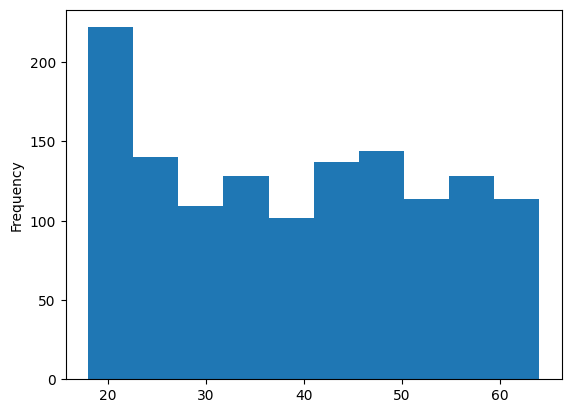

In [162]:
X["age"].plot(kind="hist")#in pandas is used to create a histogram of the "age" column in the DataFrame X.

<Axes: ylabel='Frequency'>

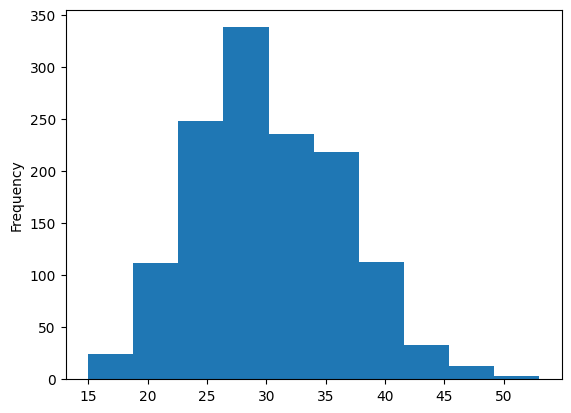

In [163]:
X["bmi"].plot(kind="hist")

In [164]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [166]:
#to prepare our data we can borrow few classes from scikit leran
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#create a coloumn transformer
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),#turn all the values in these columns between 0 and 1    
(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

#create x and y value
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with  normalization (MinMaxScaler ) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [167]:
#what our data looks like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [168]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [169]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded lets build a neural network model  on it and see how it goes

In [170]:
tf.random.set_seed(42)

#1.create the model
insurance_model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.compile
insurance_model_5.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

# 3.fit
history_5=insurance_model_5.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13258.9033 - mae: 13258.9033
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12154.1670 - mae: 12154.1670
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8459.2266 - mae: 8459.2266
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7614.7349 - mae: 7614.7349
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7160.7305 - mae: 7160.7305
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6575.3096 - mae: 6575.3096
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5720.1558 - mae: 5720.1558
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4537.5425 - mae: 4537.5425
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3736.5813 - mae: 3736.5813
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3638.8352 - mae: 3638.8352
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3624.9136 - mae: 3624.9136
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [175]:
insurance_model_5.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3215.2795 - mae: 3215.2795 


[3165.284423828125, 3165.284423828125]